Options Pricing Direct Machine Learning Method (Straight Target) - (American Option Price)

In [56]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost
import catboost
import optuna

In [57]:
# Reading files from the github repo Direct Method 
columns = ['asset_price', 'maturity', 'rate', 'div', 'ivol', 'european_op', 'american_op'] 
df_model_with_ordinary_features = pd.read_csv('/Users/nazymazimbayev/Documents/git-projects/dataoptions/DataIn/V2.csv')
df_model_with_ordinary_features.columns = columns
df_model_with_ordinary_features.head()

,asset_price,maturity,rate,div,ivol,european_op,american_op
0,113.935171,0.285741,0.008467,0.023575,0.538127,6.612110,6.612107
1,98.305405,0.813916,0.019547,0.018027,0.048863,2.601042,2.626842
2,109.189731,0.713558,0.022951,0.015280,0.303538,6.397872,6.430745
3,83.402084,2.879962,0.042272,0.058719,0.163288,20.609465,20.903553
4,127.549831,0.907992,0.026664,0.017533,0.562713,12.093558,12.156191


In [58]:
data = df_model_with_ordinary_features.sample(frac=0.95, random_state=786)
data_unseen = df_model_with_ordinary_features.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (95432, 7)
Unseen Data For Predictions (5023, 7)


In [59]:
# Model 1 with ordinary features data preparation
from pycaret.regression import *
exp_model_dm1 = setup(data = data, target = 'american_op', session_id=123,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  log_experiment = True, experiment_name = 'direct_method_1', train_size=0.95)

,Description,Value
0,session_id,123
1,Target,american_op
2,Original Data,"(100455, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(70318, 6)"


In [62]:
top3 = compare_models(n_select = 3, exclude=['et','rf'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0915,0.0238,0.1542,0.9998,0.0099,0.0079,2.2670
xgboost,Extreme Gradient Boosting,0.1095,0.0373,0.1931,0.9997,0.0132,0.0088,2.7670
lightgbm,Light Gradient Boosting Machine,0.1102,0.0525,0.2284,0.9995,0.0130,0.0088,1.0050
gbr,Gradient Boosting Regressor,0.1931,0.1118,0.3339,0.9990,0.0220,0.0157,3.3650
dt,Decision Tree Regressor,0.1471,0.1201,0.3464,0.9989,0.0242,0.0113,0.1820
knn,K Neighbors Regressor,0.5287,0.5260,0.7252,0.9954,0.0703,0.0628,0.0790
huber,Huber Regressor,0.5984,1.2217,1.1030,0.9893,0.1496,0.1335,0.0760
lar,Least Angle Regression,0.7815,1.4051,1.1840,0.9876,0.1284,0.1199,0.0290
br,Bayesian Ridge,0.7815,1.4051,1.1840,0.9876,0.1284,0.1199,0.0390
ridge,Ridge Regression,0.7815,1.4051,1.1840,0.9876,0.1284,0.1199,0.0280


In [63]:
tuned_top3 = [tune_model(i) for i in top3]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_mae_model = automl(optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0697,0.0165,0.1285,0.9999,0.0092,0.0062
1,0.0707,0.0149,0.1223,0.9999,0.0084,0.0060
2,0.0698,0.0181,0.1345,0.9998,0.0091,0.0059
3,0.0690,0.0142,0.1191,0.9999,0.0091,0.0060
4,0.0692,0.0146,0.1210,0.9999,0.0092,0.0060
5,0.0725,0.0191,0.1380,0.9998,0.0100,0.0064
6,0.0695,0.0161,0.1268,0.9999,0.0094,0.0062
7,0.0686,0.0142,0.1190,0.9999,0.0083,0.0059
8,0.0842,0.0256,0.1600,0.9998,0.0105,0.0075


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will b

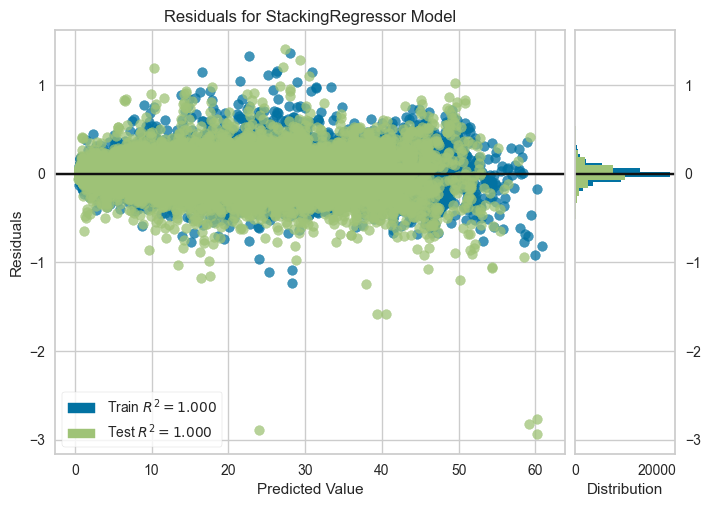

In [66]:
plot_model(best_mae_model)

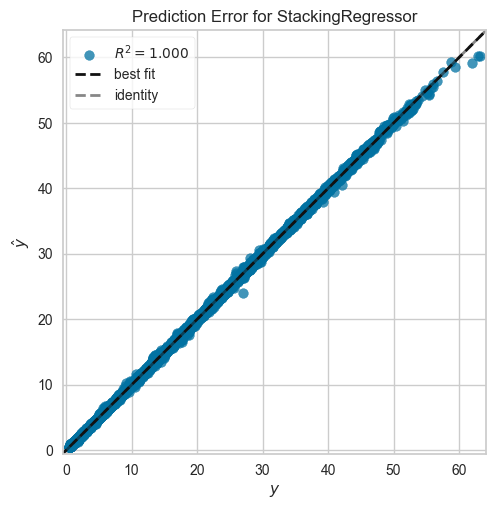

In [67]:
plot_model(best_mae_model, plot = 'error')

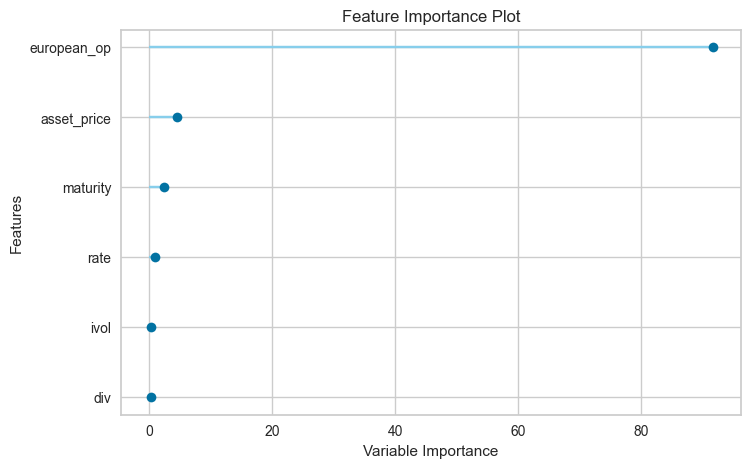

In [69]:
plot_model(top3[0], plot='feature')

In [64]:
print(best_mae_model)

PowerTransformedTargetRegressor(cv=5,
                                estimators=[('catboost',
                                             <catboost.core.CatBoostRegressor object at 0x7fab6b704880>),
                                            ('xgboost',
                                             XGBRegressor(base_score=0.5,
                                                          booster='gbtree',
                                                          colsample_bylevel=1,
                                                          colsample_bynode=1,
                                                          colsample_bytree=0.9,
                                                          enable_categorical=False,
                                                          gamma=0, gpu_id=-1,
                                                          importance_type=None,
                                                          interaction_constraints='',
                            

In [65]:
save_model(best_mae_model, 'best_mae_model_with ordinary_features')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='american_op', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                                                         min_split_gain=0.7,
                                                                                                         n_estimators=180,
                                                                 

In [72]:
final_best_model = finalize_model(best_mae_model)
print(final_best_model)

/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/nazymazimbayev/opt/anaconda3/envs

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will b

/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will b

/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will b

/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will b

/Users/nazymazimbayev/opt/anaconda3/envs/universalml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


PowerTransformedTargetRegressor(cv=5,
                                estimators=[('catboost',
                                             <catboost.core.CatBoostRegressor object at 0x7fab637a0220>),
                                            ('xgboost',
                                             XGBRegressor(base_score=0.5,
                                                          booster='gbtree',
                                                          colsample_bylevel=1,
                                                          colsample_bynode=1,
                                                          colsample_bytree=0.9,
                                                          enable_categorical=False,
                                                          gamma=0, gpu_id=-1,
                                                          importance_type=None,
                                                          interaction_constraints='',
                            

In [73]:
predict_model(final_best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.0650,0.0103,0.1016,0.9999,0.0071,0.0057


,asset_price,maturity,rate,div,ivol,european_op,american_op,Label
0,1.273465,-0.050562,-1.224179,1.751128,0.432802,-0.525218,9.358032,9.355887
1,-1.047792,0.697266,-1.245223,1.205953,-0.641946,1.076994,26.580460,26.526608
2,0.857265,1.270940,-0.107690,0.301623,1.618097,1.208849,28.705334,28.595427
3,-0.142254,-1.544916,1.751760,1.398999,-0.729753,-0.903913,6.332456,6.305480
4,-0.904174,-1.588326,-1.517962,1.343794,0.739330,0.452804,18.805042,18.838585
...,...,...,...,...,...,...,...,...
30132,0.200790,1.550413,-0.524385,-1.257723,-0.106029,0.557266,20.548159,20.700624
30133,-1.551427,-1.213886,-0.662405,1.726763,-1.103436,1.197650,28.240829,28.230769
30134,-0.015696,1.680023,-0.110850,-0.158740,-1.352785,-0.481067,10.065220,10.164581
30135,-0.908920,-1.264907,-1.676725,-0.596056,1.629541,0.676345,21.429115,21.487067


In [74]:
unseen_predictions = predict_model(final_best_model, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.0646,0.0098,0.0989,0.9999,0.0068,0.0057


,asset_price,maturity,rate,div,ivol,european_op,american_op,Label
0,85.411375,0.467677,0.003564,0.097180,0.102791,18.220903,18.220904,18.235901
1,86.928069,0.701853,0.029514,0.038928,0.018545,13.364723,13.364723,13.469775
2,106.802615,0.665436,0.007637,0.020037,0.238684,5.340597,5.340640,5.311126
3,74.557547,0.680546,0.024866,0.002517,0.103077,23.893106,25.442390,25.379029
4,113.842459,4.721544,0.025811,0.044534,0.271343,19.143581,19.326885,19.525110
